# Prepare Module

In [253]:
import pandas as pd                 # Load Dataset
import seaborn as sns               # Visualisasi
import numpy as np                  # perhitungan matematika
import matplotlib.pyplot as plt     # Visualisasi
import plotly.express as px         # Visualisasi
import warnings
warnings.filterwarnings('ignore')

print("Module Ready")

Module Ready


Load Dataset

In [254]:
df = pd.read_csv('Stunting_Klasifikasi_Coba.csv')
df.head(5)

,Umur,BB,TB,Status Gizi,Status
0,22,4,55,Normal,Stunting
1,30,13,76,Normal,Stunting
2,26,5,50,Pendek,Stunting
3,29,5,90,Pendek,Stunting
4,32,6,54,Pendek,Stunting


In [255]:
df.columns

Index(['Umur ', 'BB ', 'TB ', 'Status Gizi', 'Status '], dtype='object')

In [256]:
# Encoding Dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
label = le.fit_transform(df['Status Gizi'])
 
label

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [257]:
# Memasukan Colom yang sudah di encoding kedalam df

df.drop("Status Gizi", axis=1, inplace=True)

df["Status Gizi"] = label
df

,Umur,BB,TB,Status,Status Gizi
0,22,4,55,Stunting,0
1,30,13,76,Stunting,0
2,26,5,50,Stunting,1
3,29,5,90,Stunting,1
4,32,6,54,Stunting,1
...,...,...,...,...,...
109,47,21,86,Normal,1
110,2,7,79,Normal,1
111,6,15,80,Normal,1
112,12,14,80,Normal,1


Show Data information

In [258]:
kolom_baris     = df.shape        # Mengecek Jumlah Baris dan Kolom
nama_kolom      = df.columns      # Menngcek Nama-Nama Kolom
type_dataset    = df.dtypes       # Mengecek Type Data apa saja yang digunakan
info_dataset    = df.info()       # Mengecek Missing Value Pada Dataset
summary_dataset = df.describe()   # Mengecek Summary pada dataset (mean,Median,std etc)

print("\n\nInfor Dataset        : ",info_dataset,
      "\n\nJumlah Baris x Kolom : ",kolom_baris, 
      "\n\nNama-nama Kolom      : ",nama_kolom,
      "\n\nType Dataset         : ",type_dataset,
      "\n\nSummary Dataset      : ",summary_dataset)
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Umur         114 non-null    int64 
 1   BB           114 non-null    int64 
 2   TB           114 non-null    int64 
 3   Status       114 non-null    object
 4   Status Gizi  114 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 4.1+ KB


Infor Dataset        :  None 

Jumlah Baris x Kolom :  (114, 5) 

Nama-nama Kolom      :  Index(['Umur ', 'BB ', 'TB ', 'Status ', 'Status Gizi'], dtype='object') 

Type Dataset         :  Umur            int64
BB              int64
TB              int64
Status         object
Status Gizi     int32
dtype: object 

Summary Dataset      :              Umur          BB          TB   Status Gizi
count  114.000000  114.000000  114.000000   114.000000
mean    24.043860    9.798246   81.210526     0.736842
std     17.415988    5.641471   13.030579  

In [259]:
print("Summary Dataset :",summary_dataset)

Summary Dataset :             Umur          BB          TB   Status Gizi
count  114.000000  114.000000  114.000000   114.000000
mean    24.043860    9.798246   81.210526     0.736842
std     17.415988    5.641471   13.030579     0.442292
min      2.000000    2.000000   50.000000     0.000000
25%     10.000000    5.000000   79.000000     0.000000
50%     21.000000    9.000000   81.500000     1.000000
75%     42.000000   15.000000   89.000000     1.000000
max     58.000000   21.000000   99.000000     1.000000


In [260]:
df = df.drop_duplicates()     # Menghapus dataset yang double

In [261]:
cek_mising_value = df.isnull().sum()    # mengecek data yang kosong
print("Menampilkan Data Kosong :\n\n",cek_mising_value)

Menampilkan Data Kosong :

 Umur           0
BB             0
TB             0
Status         0
Status Gizi    0
dtype: int64


# Visualisasi Dataset

In [262]:
df.columns

Index(['Umur ', 'BB ', 'TB ', 'Status ', 'Status Gizi'], dtype='object')

<AxesSubplot:xlabel='Status ', ylabel='count'>

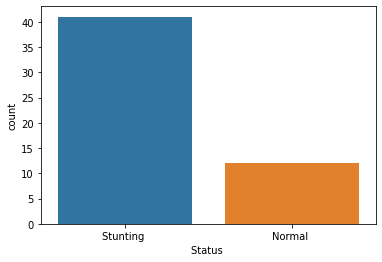

In [263]:
# Visualisasi with seaborn
sns.countplot('Status ',data=df)


In [264]:
# visualisasi with plotly
px.histogram(df, x="Status ", color = 'Status ', width=800, height=400)

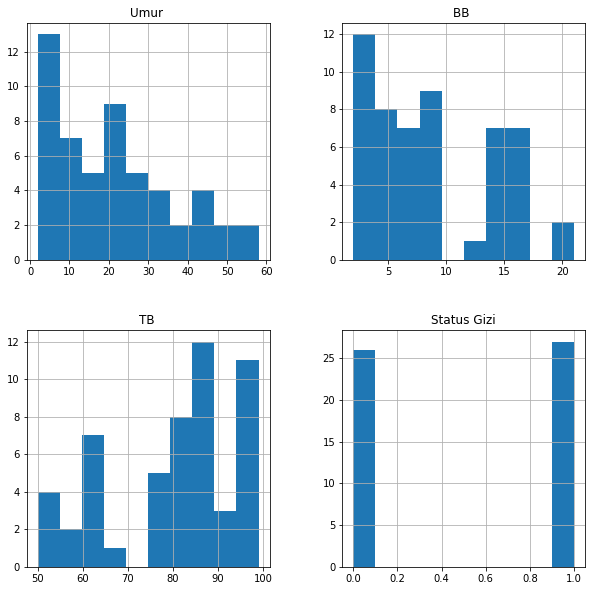

In [265]:
# Visualisasi Histogram semua kriteria dataset dengan matplotlib
df.hist(bins = 10, figsize = (10, 10))

plt.show()

* Melihat Korelasi dataset


<AxesSubplot:>

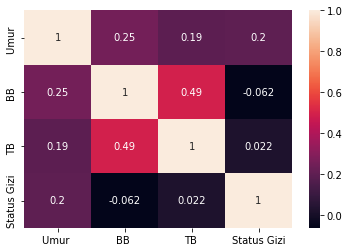

In [266]:
korelasi = df.corr()
sns.heatmap(korelasi, annot = True)

In [267]:
df.columns

Index(['Umur ', 'BB ', 'TB ', 'Status ', 'Status Gizi'], dtype='object')

* Melihat Persebaran Data

# SPLITING DATASET

In [268]:
df.columns

Index(['Umur ', 'BB ', 'TB ', 'Status ', 'Status Gizi'], dtype='object')

In [269]:
# Membagi dataset kedalam variabel x dan y
target_klasifikasi = 'Status '
y = df[target_klasifikasi]               # Membuat y dengan Outcome

seleksi_df = df.drop(target_klasifikasi, axis = 1) # Membuat X tanpa Outcome
seleksi_df.head(3)
X = seleksi_df

In [270]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [271]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1])

In [272]:
from sklearn.model_selection import train_test_split          # Module Spliting Dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [273]:
# Melihat Hasil Spliting Dataset
print(f"Jumlah X Train : ",X_train.shape,
      "\nJumlah y Train : ",y_train.shape,
      "\nJumlah X Test : ",X_test.shape,
      "\nJumlah y test : ",y_test.shape,
      "\n\nTotal Data :\n",df.count())

Jumlah X Train :  (42, 4) 
Jumlah y Train :  (42,) 
Jumlah X Test :  (11, 4) 
Jumlah y test :  (11,) 

Total Data :
 Umur           53
BB             53
TB             53
Status         53
Status Gizi    53
dtype: int64


# MEMBANGUN MODEL MACHINE LEARNING

In [274]:
from sklearn.naive_bayes import GaussianNB                            # digunakan untuk metode NBC
from sklearn.model_selection import RepeatedStratifiedKFold           # digunakan untuk nilai k
from sklearn.metrics import classification_report,confusion_matrix    # digunakan untuk menhitung akurasi
from sklearn.metrics import f1_score, precision_score, recall_score   # digunakan untuk menghitung akurasu
from sklearn.model_selection import GridSearchCV                      # kombinasi yang berbeda dari semua hyperparameter         

print("Library NBC Siap")

Library NBC Siap


* Membuat Model yang di tentukan oleh machine learning

In [275]:
param_grid_nb = {
    'var_smoothing' : np.logspace(0, -2, num = 10)
}
nbModel_grid = GridSearchCV(estimator = GaussianNB(), 
                            param_grid = param_grid_nb, 
                            cv = 10, n_jobs =1 )

In [276]:
best_model_nbc = nbModel_grid.fit(X_train, y_train)

In [277]:
best_model_nbc

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=1,
             param_grid={'var_smoothing': array([1.        , 0.59948425, 0.35938137, 0.21544347, 0.12915497,
       0.07742637, 0.04641589, 0.02782559, 0.01668101, 0.01      ])})

In [278]:
nbc_pred = best_model_nbc.predict(X_test)

In [279]:
nbc_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

# Evaluasi Model

In [280]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

Classiofication Report :                precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.88      0.88      0.88         8

    accuracy                           0.82        11
   macro avg       0.77      0.77      0.77        11
weighted avg       0.82      0.82      0.82        11


 F1 : 
 0.875

 Precsion score : 
 0.875

 Recall score : 
 0.875

 Confusion Matrix : 



<AxesSubplot:>

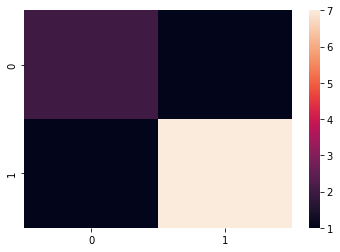

In [281]:
print("Classiofication Report : ", classification_report(y_test,nbc_pred))
print("\n F1 : \n",f1_score(y_test,nbc_pred))
print("\n Precsion score : \n", precision_score(y_test,nbc_pred))
print("\n Recall score : \n", recall_score(y_test,nbc_pred))
print("\n Confusion Matrix : \n")
sns.heatmap(confusion_matrix(y_test,nbc_pred))

In [282]:
# Visualisasi Confusion Matrix
import plotly.express as px
fig = px.imshow(confusion_matrix(y_test,nbc_pred), width = 500, height = 400)
fig.show()

In [283]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [285]:
# Mencetak Akurasi
accuracy = accuracy_score(y_test,nbc_pred)
akurasi = accuracy * 100

print("Akurasi yang didapat : ", akurasi, "%")

Akurasi yang didapat :  81.81818181818183 %


# Meprediksi Inputan User

In [286]:
df.head(1)

,Umur,BB,TB,Status,Status Gizi
0,22,4,55,Stunting,0


In [287]:
user = ([[47, 26,	80,	0]])
user

[[47, 26, 80, 0]]

In [288]:
nbc_pred = best_model_nbc.predict(user)
nbc_pred
classifier = nbc_pred

In [289]:
if nbc_pred == ([1]):
    print("Balita Stunting")
else :
    print("Balita Normal")

Balita Normal


In [ ]:
import pickle

In [ ]:
file_name = 'Status_Stunting_Balita.sav'
pickle.dump(best_model_nbc,open(file_name,'wb'))

In [ ]:
file_name = 'Akuraccy_Status_Stunting_Balita.sav'
pickle.dump(accuracy,open(file_name,'wb'))